In [1]:
import pandas as pd
df = pd.read_csv ('data.csv')
df.head()

,Type,Prix,Adresse,Surface,Pièces,Chambres,Salles_bain,Info1,Info2,Info3
0,Appartement,4 100 000,Racine à Casablanca,229 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,2ème étage
1,Appartement,4 500 000,Racine Extension à Casablanca,297 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,1er étage
2,Appartement,4 200 000,Gauthier à Casablanca,244 m²,4 Pièces,3 Chambres,4 Salles de bains,Nouveau,5-10 ans,6ème étage
3,Appartement,1 547 000,Maârif à Casablanca,91 m²,5 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN
4,Appartement,1 300 000,Maârif à Casablanca,78 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN


In [2]:
df = df[df.Surface != 'None']
nb_pieces = df['Pièces'].str.split(' ').str.get(0).astype(int)
df['nb_pieces'] = nb_pieces
nb_chambres = df['Chambres'].str.split(' ').str.get(0).astype(int)
df['nb_chambres'] = nb_chambres
nb_salles_bain = df['Salles_bain'].str.split(' ').str.get(0).astype(int)
df['nb_salles_bain'] = nb_salles_bain
Surface_metre_carre = df['Surface'].str.split(' ').str.get(0)
df['Surface_metre_carre'] = Surface_metre_carre.astype(int)
df['Prix'] = df['Prix'].str.replace('\xa0', '').astype(int)
df['Ville'] = df['Adresse'].str.split().str.get(-1)
df.head()

,Type,Prix,Adresse,Surface,Pièces,Chambres,Salles_bain,Info1,Info2,Info3,nb_pieces,nb_chambres,nb_salles_bain,Surface_metre_carre,Ville
0,Appartement,4100000,Racine à Casablanca,229 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,2ème étage,4,3,3,229,Casablanca
1,Appartement,4500000,Racine Extension à Casablanca,297 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,1er étage,4,3,3,297,Casablanca
2,Appartement,4200000,Gauthier à Casablanca,244 m²,4 Pièces,3 Chambres,4 Salles de bains,Nouveau,5-10 ans,6ème étage,4,3,4,244,Casablanca
3,Appartement,1547000,Maârif à Casablanca,91 m²,5 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,5,2,2,91,Casablanca
4,Appartement,1300000,Maârif à Casablanca,78 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,3,2,2,78,Casablanca


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lee = LabelEncoder()
df['Id_ville']  = 1+le.fit_transform(df.Ville)
df['Id_type']  = 1+lee.fit_transform(df.Type)
df

,Type,Prix,Adresse,Surface,Pièces,Chambres,Salles_bain,Info1,Info2,Info3,nb_pieces,nb_chambres,nb_salles_bain,Surface_metre_carre,Ville,Id_ville,Id_type
0,Appartement,4100000,Racine à Casablanca,229 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,2ème étage,4,3,3,229,Casablanca,60,1
1,Appartement,4500000,Racine Extension à Casablanca,297 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,1er étage,4,3,3,297,Casablanca,60,1
2,Appartement,4200000,Gauthier à Casablanca,244 m²,4 Pièces,3 Chambres,4 Salles de bains,Nouveau,5-10 ans,6ème étage,4,3,4,244,Casablanca,60,1
3,Appartement,1547000,Maârif à Casablanca,91 m²,5 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,5,2,2,91,Casablanca,60,1
4,Appartement,1300000,Maârif à Casablanca,78 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,3,2,2,78,Casablanca,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,Riad,850000,Kasba à Marrakech,600 m²,13 Pièces,12 Chambres,12 Salles de bains,Bon état,NaN,NaN,13,12,12,600,Marrakech,143,3
12988,Riad,730000,Marrakech-Médina à Marrakech,280 m²,10 Pièces,7 Chambres,7 Salles de bains,Bon état,NaN,NaN,10,7,7,280,Marrakech,143,3
12989,Riad,500000,Kasba à Marrakech,270 m²,8 Pièces,5 Chambres,5 Salles de bains,NaN,NaN,NaN,8,5,5,270,Marrakech,143,3
12990,Riad,3456000,Essaouira,160 m²,7 Pièces,5 Chambres,3 Salles de bains,NaN,NaN,NaN,7,5,3,160,Essaouira,81,3


In [4]:
from sklearn import preprocessing
import numpy as np 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
X= df[['Id_type','Surface_metre_carre','Id_ville','nb_pieces','nb_chambres','nb_salles_bain']] 
y= df.Prix
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True) 

In [6]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train,y_train) 

LinearRegression()

In [7]:
predection = model.predict(X_test)

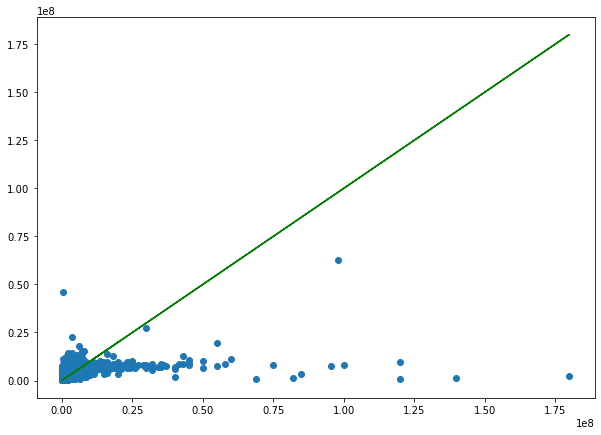

In [8]:
plt.figure(figsize=(10,7)) 
plt.scatter(y_test , predection)
plt.plot(y_test , y_test,color='g')

In [9]:
from sklearn import metrics 
mean_sq_err = metrics.mean_squared_error(y_test , predection) 
RMSE = np.sqrt(mean_sq_err) 
RMSE

7473083.57755619

In [10]:
X2= df[['Id_type','Surface_metre_carre','Id_ville','nb_chambres','nb_salles_bain']] 
y2= df.Prix
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,shuffle=True) 


In [11]:
model2 = LinearRegression() 
model2.fit(X2_train,y2_train) 

LinearRegression()

In [12]:
predection2 = model2.predict(X2_test)

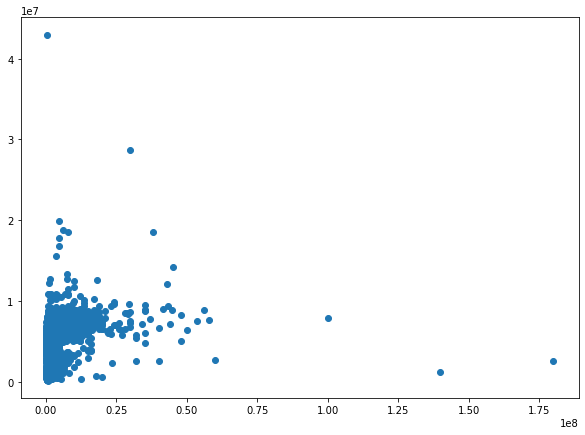

In [13]:
plt.figure(figsize=(10,7)) 
plt.scatter(y2_test , predection2) 

In [14]:
mean_sq_err2 = metrics.mean_squared_error(y2_test , predection2) 
RMSE2 = np.sqrt(mean_sq_err2)
RMSE2

6363148.102779191

In [15]:
********************************************

SyntaxError: invalid syntax (<ipython-input-15-ac514d4e2584>, line 1)

In [ ]:
#Recomandation system engine

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
df = pd.read_csv ('data.csv')
df = df[df.Surface != 'None']

nb_pieces = df['Pièces'].str.split(' ').str.get(0).astype(int)
df['nb_pieces'] = nb_pieces
nb_chambres = df['Chambres'].str.split(' ').str.get(0).astype(int)
df['nb_chambres'] = nb_chambres
nb_salles_bain = df['Salles_bain'].str.split(' ').str.get(0).astype(int)
df['nb_salles_bain'] = nb_salles_bain
Surface_metre_carre = df['Surface'].str.split(' ').str.get(0)
df['Surface_metre_carre'] = Surface_metre_carre.astype(int)
df['Prix'] = df['Prix'].str.replace('\xa0', '').astype(str)
df['Ville'] = df['Adresse'].str.split().str.get(-1)
df["id"] = df.index + 1
  
df.head()



,Type,Prix,Adresse,Surface,Pièces,Chambres,Salles_bain,Info1,Info2,Info3,nb_pieces,nb_chambres,nb_salles_bain,Surface_metre_carre,Ville,id
0,Appartement,4100000,Racine à Casablanca,229 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,2ème étage,4,3,3,229,Casablanca,1
1,Appartement,4500000,Racine Extension à Casablanca,297 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,1er étage,4,3,3,297,Casablanca,2
2,Appartement,4200000,Gauthier à Casablanca,244 m²,4 Pièces,3 Chambres,4 Salles de bains,Nouveau,5-10 ans,6ème étage,4,3,4,244,Casablanca,3
3,Appartement,1547000,Maârif à Casablanca,91 m²,5 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,5,2,2,91,Casablanca,4
4,Appartement,1300000,Maârif à Casablanca,78 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,3,2,2,78,Casablanca,5


In [18]:
columns=['id','Type','Prix','Ville','Surface','Pièces','Chambres','Salles_bain','Info1','Info2','Info3']



In [19]:
df[columns].head(3)

,id,Type,Prix,Ville,Surface,Pièces,Chambres,Salles_bain,Info1,Info2,Info3
0,1,Appartement,4100000,Casablanca,229 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,2ème étage
1,2,Appartement,4500000,Casablanca,297 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,1er étage
2,3,Appartement,4200000,Casablanca,244 m²,4 Pièces,3 Chambres,4 Salles de bains,Nouveau,5-10 ans,6ème étage


In [20]:
df[columns].isnull().values.any()



True

In [21]:
def get_important_ftr(data):
    important_features=[]
    for i in range(0,data.shape[0]):
        important_features.append(data['Type'][i]+' '+data['Prix'][i]+' '+data['Ville'][i]+' '+data['Surface'][i]+' '+data['Pièces'][i]+' '+data['Chambres'][i]+' '+data['Salles_bain'][i])#+' '+data['Info1'][i]+' '+data['Info2'][i]+' '+data['Info3'][i])
    return important_features 

In [54]:
df['important_features']=get_important_ftr(df)
df.head(3)

,Type,Prix,Adresse,Surface,Pièces,Chambres,Salles_bain,Info1,Info2,Info3,nb_pieces,nb_chambres,nb_salles_bain,Surface_metre_carre,Ville,id,important_features
0,Appartement,4100000,Racine à Casablanca,229 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,2ème étage,4,3,3,229,Casablanca,1,Appartement 4100000 Casablanca 229 m² 4 Pièce...
1,Appartement,4500000,Racine Extension à Casablanca,297 m²,4 Pièces,3 Chambres,3 Salles de bains,Nouveau,5-10 ans,1er étage,4,3,3,297,Casablanca,2,Appartement 4500000 Casablanca 297 m² 4 Pièce...
2,Appartement,4200000,Gauthier à Casablanca,244 m²,4 Pièces,3 Chambres,4 Salles de bains,Nouveau,5-10 ans,6ème étage,4,3,4,244,Casablanca,3,Appartement 4200000 Casablanca 244 m² 4 Pièce...


In [82]:
print(df['important_features'])

0        Appartement 4100000 Casablanca 229 m²  4 Pièce...
1        Appartement 4500000 Casablanca 297 m²  4 Pièce...
2        Appartement 4200000 Casablanca 244 m²  4 Pièce...
3        Appartement 1547000 Casablanca 91 m²  5 Pièces...
4        Appartement 1300000 Casablanca 78 m²  3 Pièces...
                               ...                        
12987    Riad 850000 Marrakech 600 m²  13 Pièces 12 Cha...
12988    Riad 730000 Marrakech 280 m²  10 Pièces 7 Cham...
12989    Riad 500000 Marrakech 270 m²  8 Pièces 5 Chamb...
12990    Riad 3456000 Essaouira 160 m²  7 Pièces 5 Cham...
12991    Riad 850000 Marrakech 600 m²  12 Pièces 10 Cha...
Name: important_features, Length: 12992, dtype: object


In [46]:
cm=CountVectorizer().fit_transform(df['important_features'])
cs=cosine_similarity(cm)
print(cs)

[[1.         0.8        0.8        ... 0.6        0.6        0.48989795]
 [0.8        1.         0.8        ... 0.6        0.6        0.48989795]
 [0.8        0.8        1.         ... 0.6        0.6        0.48989795]
 ...
 [0.6        0.6        0.6        ... 1.         0.7        0.65319726]
 [0.6        0.6        0.6        ... 0.7        1.         0.57154761]
 [0.48989795 0.48989795 0.48989795 ... 0.65319726 0.57154761 1.        ]]


In [48]:
cs.shape

(12992, 12992)

In [84]:
Ville_test='Rabat'
Ville_cherchée=df[df.Ville==Ville_test]['id'].values[0]


In [85]:
scores= list(enumerate(cs[Ville_cherchée]))
print(cs[Ville_cherchée])

[0.7        0.7        0.7        ... 0.7        0.6        0.57154761]


In [87]:
sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)

In [88]:
sorted_scores=sorted_scores[1:]

In [89]:
print(sorted_scores)

[(23, 0.8999999999999999), (24, 0.8999999999999999), (162, 0.8999999999999999), (1141, 0.8999999999999999), (2249, 0.8999999999999999), (3259, 0.8999999999999999), (3439, 0.8999999999999999), (4747, 0.8999999999999999), (5104, 0.8999999999999999), (5116, 0.8999999999999999), (5636, 0.8999999999999999), (8, 0.7999999999999999), (11, 0.7999999999999999), (44, 0.7999999999999999), (50, 0.7999999999999999), (69, 0.7999999999999999), (74, 0.7999999999999999), (75, 0.7999999999999999), (76, 0.7999999999999999), (89, 0.7999999999999999), (90, 0.7999999999999999), (105, 0.7999999999999999), (109, 0.7999999999999999), (112, 0.7999999999999999), (120, 0.7999999999999999), (143, 0.7999999999999999), (201, 0.7999999999999999), (209, 0.7999999999999999), (229, 0.7999999999999999), (238, 0.7999999999999999), (239, 0.7999999999999999), (240, 0.7999999999999999), (241, 0.7999999999999999), (258, 0.7999999999999999), (268, 0.7999999999999999), (280, 0.7999999999999999), (281, 0.7999999999999999), (284,

In [91]:
j=0
print('The 10 most recommended locations to',Ville_test,'are:\n')
for item in sorted_scores:
    Ville_cherchée=df[df.id==item[0]]['important_features'].values[0]
    print(j+1,Ville_cherchée)
    j=j+1
    if j>9:
         break

The 10 most recommended locations to Rabat are:

1 Appartement 900000 Agadir 76 m²  2 Pièces 3 Chambres 2 Salles de bains
2 Appartement 1300000 Marrakech 130 m²  4 Pièces 2 Chambres 2 Salles de bains
3 Appartement 819000 Bouazza 63 m²  3 Pièces 1 Chambre 1 Salle de bain
4 Appartement 1100000 Marrakech 83 m²  3 Pièces 2 Chambres 1 Salle de bain
5 Appartement 900000 Tanger 106 m²  3 Pièces 2 Chambres 1 Salle de bain
6 Appartement 550000 Agadir 74 m²  3 Pièces 2 Chambres 1 Salle de bain
7 Appartement 350000 Fès 88 m²  2 Pièces 3 Chambres 1 Salle de bain
8 Appartement 560000 Marrakech 65 m²  4 Pièces 2 Chambres 2 Salles de bains
9 Appartement 950000 Casablanca 125 m²  5 Pièces 3 Chambres 2 Salles de bains
10 Appartement 1090000 Temara 88 m²  4 Pièces 2 Chambres 2 Salles de bains
